Author: S. Terki
## A bit of context ...

The dataset considered in this project describe 120 years of olympic games, including all the Games from Athens 1896 to Rio 2016. The data contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:
+ `ID` - Unique number for each athlete
+ `Name` - Athlete's name
+ `Sex` - M or F
+ `Age` - Integer
+ `Height` - In centimeters
+ `Weight` - In kilograms
+ `Team` - Team name
+ `NOC` - National Olympic Committee (3-letter code)
+ `Games` - Year and season
+ `Year` - Integer
+ `Season` - Summer or Winter
+ `City` - Host city
+ `Sport` - Sport
+ `Event` - Event
+ `Medal` - Gold, Silver, Bronze, or NA

The goal of this project is to explore these data from different points of view, in order to isolate some tendencies. In the last part of the projet, we will try to build a predictive model based on these data.

## Packages importation and data

### Import the usual packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Import the data

The data file can be found in `lecture-python/data` directory and is called `athlete_events.csv`. This file in the csv format. Create a pandas dataframe `df` from the csv file, and print the first 5 rows of the data.

In [159]:
df = pd.read_csv("athlete_events.csv")
df.head(5) #or print(df.head(5))

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 1. Data exploration (10pts)

**1.1 Basic quantities.** The first step to get familiar with the dataset is to look at basic quantities. Please provide:
 1. List of years with olympic games
 1. number of countries, defined as a unique National Olympic Commitee identifier (NOC), over the entire period
 1. number of sports over the entire period
 1. number of sport for each season, over the entire period
 1. fraction of male and female over the entire period

In [3]:
#List of years with olympic games
years = df["Year"].unique()
print("List of years with olympic games: \n{}".format(np.sort(years)), "\n")

List of years with olympic games: 
[1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1994 1996 1998 2000 2002
 2004 2006 2008 2010 2012 2014 2016] 



In [4]:
#number of countries, defined as a unique National Olympic Commitee identifier (NOC), over the entire period
countries = df["NOC"].unique()
nb_countries = np.count_nonzero(countries)
print("Number of countries over the entire period : {}".format(nb_countries))

Number of countries over the entire period : 230


In [5]:
#number of sports over the entire period
sports = df["Sport"].unique()
nb_sports = np.count_nonzero(sports)
print("Number of sports over the entire period : {}".format(nb_sports))

Number of sports over the entire period : 66


In [6]:
#number of sport for each season, over the entire period
nb_sport_seas=df.groupby('Season',as_index=False)['Sport'].count().sort_values(by='Sport',ascending=False)
print(nb_sport_seas, "\n")

   Season   Sport
0  Summer  222552
1  Winter   48564 



M    196594
F     74522
Name: Sex, dtype: int64 
 Ratio 2.638066611202061


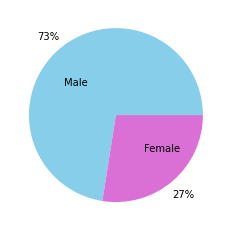

In [125]:
#fraction of male and female over the entire period
nb_sex= df['Sex'].value_counts()

#count
ratio = nb_sex["M"]/nb_sex["F"]
print(nb_sex, "\n Ratio {}".format(ratio))

#percentage pie
plt.pie(nb_sex, labels=["Male","Female"], autopct='%1.0f%%', pctdistance=1.2, labeldistance=0.5, colors=["skyblue","orchid"]);

**1.2 Biological data.** A first point of view to explore these data could be to focus on biological caracteristics of athletes. In that purpose, produce the following plots:

 1. Weight *v.s.* height *v.s.* age for both men and women (best graphical representation to be chosen)
 1. Height *v.s* time for both men and women
 1. Weight *v.s* time for both men and women
 1. Age *v.s* time for both men and women

What do you observe for the last 3 points? How can you explain this observation?

The **pariplot** is a strong and powerful tool for quickly **exploring data distributions** or **relationships** within data sets.

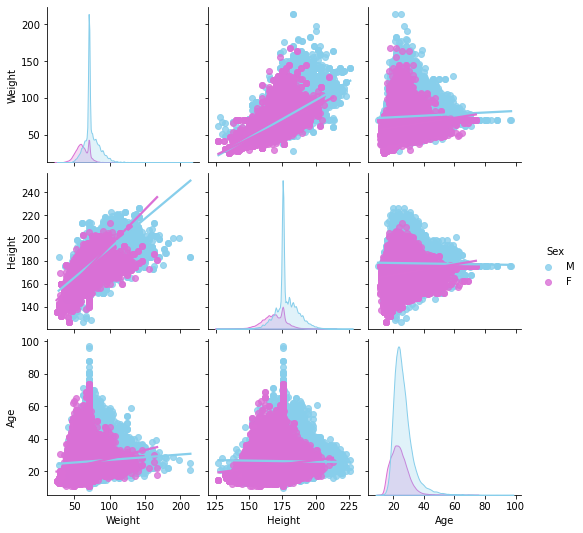

In [97]:
    #Import seaborn library
import seaborn as seaborn

    #Compare distributions for 3 variables using regression and grouped by sex  
seaborn.pairplot(df, vars=['Weight', 'Height', 'Age'],
                 kind='reg', hue='Sex', palette= ["skyblue","orchid"])  ;

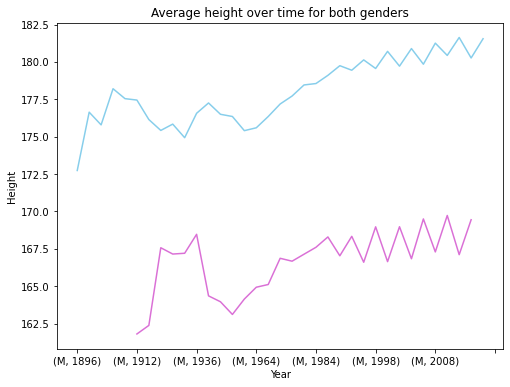

In [160]:
#Plot height vs time 
    #defining colors dictionnary
colors = {'M':'skyblue', 'F':'orchid'}

    #Group df by sex year and compute height mean
av_height = df.groupby(['Sex', 'Year'])['Height'].mean()
grouped = av_height.groupby('Sex')

    #plot
fig, ax = plt.subplots(figsize=(8, 6))
for key, group in grouped:
    group.plot(kind='line', xlabel="Year", ylabel="Height", color=colors[key])
    
plt.title('Average height over time for both genders')
plt.show()


Men are **taller** than women. After the 1960s, the average height has continued to increase for both genders

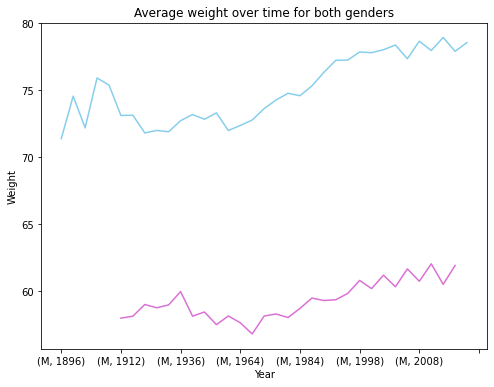

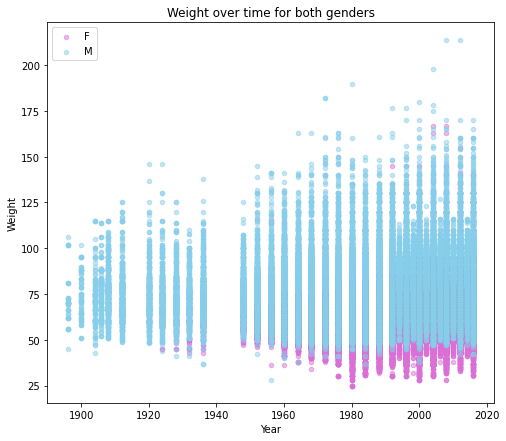

In [161]:
#Weight time
    #gather by Sex and Year and compute the mean of weight
av_weight = df.groupby(['Sex', "Year"])['Weight'].mean()
grouped = av_weight.groupby('Sex')

    #Defining colors
colors = {'M':'skyblue', 'F':'orchid'}

    #Average plot
fig, ax = plt.subplots(figsize=(8, 6))
for key, group in grouped:
    group.plot(x='Year', y='Weight', ax=ax, kind='line', label=key, xlabel="Year", ylabel="Weight", color=colors[key])
plt.title('Average weight over time for both genders')
plt.show()

    #Scatter plot 
grouped_df = df.groupby('Sex')
fig, ax = plt.subplots(figsize=(2, 6))
for key, group in grouped_df:
    group.plot(ax=ax, kind='scatter', x='Year', y='Weight', label=key, xlabel="Year", ylabel="Weight", alpha=0.5, color=colors[key], figsize = (8,7))
plt.title('Weight over time for both genders')
plt.show()

Men weigh **more** than women, and the average weight has only slightly increased over time. We thus find the same behavior of the values as with the height variable.

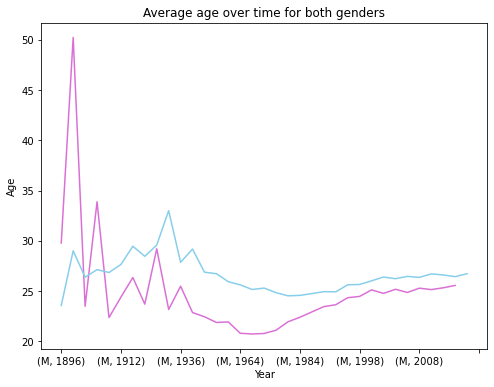

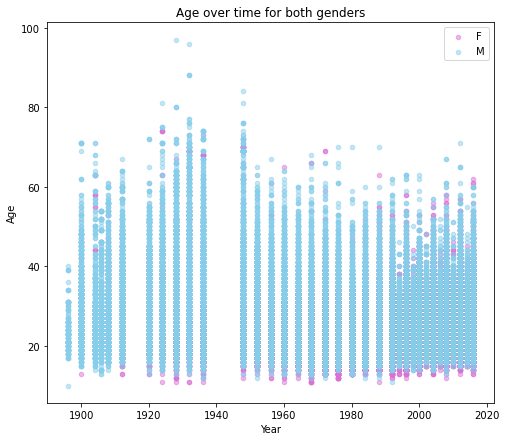

In [162]:
#Age vs time
    # Gather Sex and Year in a panda series and compute the Age mean
av_age = df.groupby(["Sex","Year"])['Age'].mean()
grouped = av_age.groupby('Sex')

    #Defining colors
colors = {'M':'skyblue', 'F':'orchid'}

    #Average plot
fig, ax = plt.subplots(figsize=(8, 6))
for key, group in grouped:
    group.plot(ax=ax, kind='line', x='Year', y='Age', label=key, xlabel="Year", ylabel="Age", color=colors[key])
plt.title('Average age over time for both genders')
plt.show()

    #Scatter plot 
grouped_df = df.groupby('Sex')
fig, ax = plt.subplots(figsize=(2, 6))

for key, group in grouped_df:
    group.plot(ax=ax, kind='scatter', x='Year', y='Age', label=key, xlabel="Year", ylabel="Age", alpha=0.5, color=colors[key], figsize = (8,7))
plt.title('Age over time for both genders')
plt.show()


As we can see, the average age of women was **highter** than men at the beginning of the 1900 year, perhaps due to outliers. Then the tendancy **shifted** around the year **1912**, where the men were older than women. 

**1.3 Parity data.** One can also look how the presence of women in Olympic Games evovled with time. To address this question, please produce the following plots:

 1. fraction male/female as function of time
 1. fraction of male/female, for each sport for 2014, and 2016 separately

<Figure size 432x288 with 0 Axes>

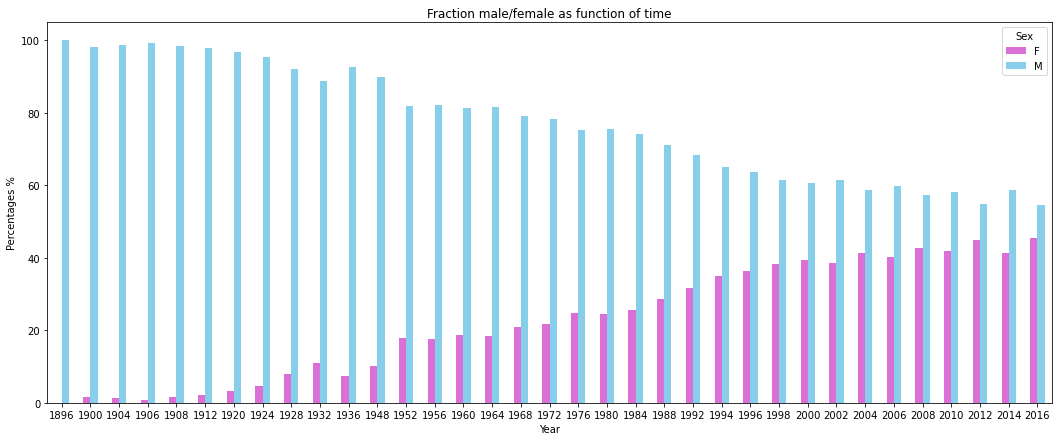

In [165]:
#fraction male/female as function of time 
plt.figure()
    #Converting to percentages with .apply(row/row.sum())
male_female_time = pd.crosstab(df.Year, df.Sex).apply(lambda r: r/r.sum(), axis=1) * 100

    #plot 
male_female_time.plot(kind='bar', rot=0, stacked=False, ylabel="Percentages %", figsize=(18,7), color=colors,\
                      title="Fraction male/female as function of time");
plt.show();

<Figure size 432x288 with 0 Axes>

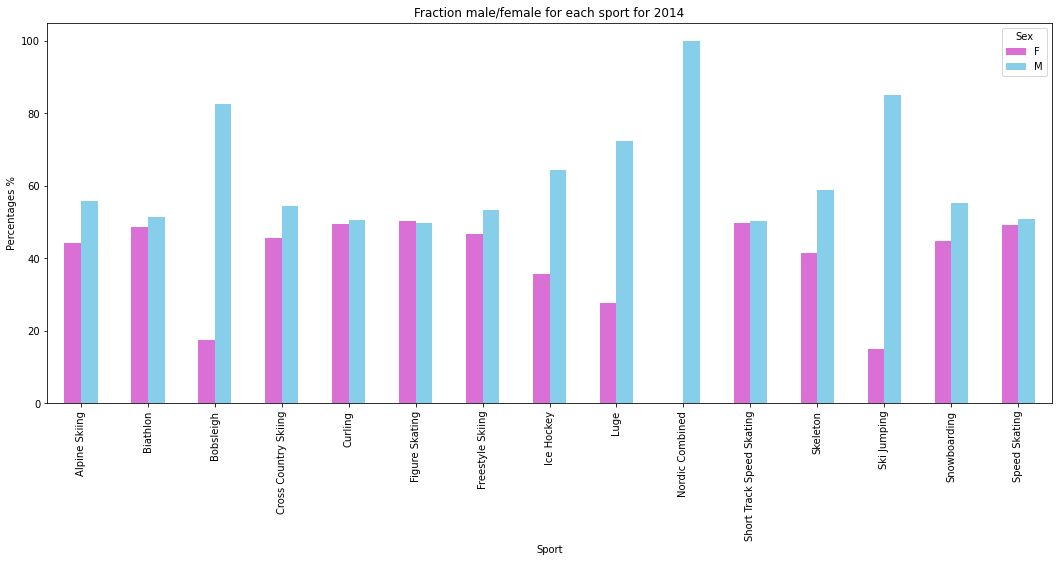

<Figure size 432x288 with 0 Axes>

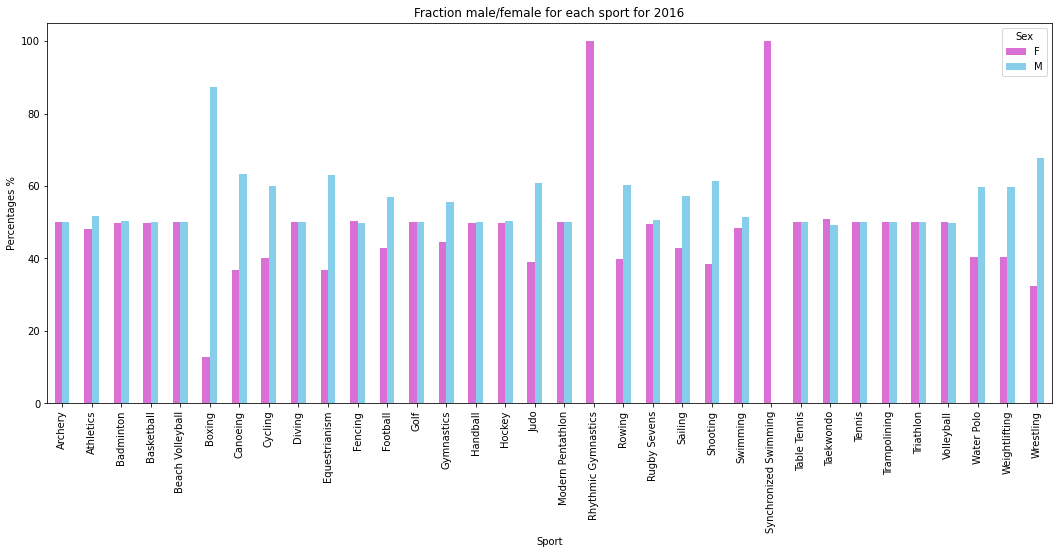

In [187]:
#fraction of male/female, for each sport for 2014, and 2016 separately 

#For 2014
    #Select 2014 year
df_2014 = df[df['Year'] == 2014]
    #Changing value to percentage
tab_2014 = pd.crosstab(df_2014.Sport, df_2014.Sex).apply(lambda r: r/r.sum(), axis=1)*100
    #bar plot
plt.figure()
tab_2014.plot(kind='bar', stacked=False,  ylabel="Percentages %", figsize=(18,7), color=colors,
         title="Fraction male/female for each sport for 2014");
plt.show();

#For 2016
    #Select 2016 year
df_2016=df[df['Year']==2016]
    #Changing value to percentage
tab_2016 = pd.crosstab(df_2016.Sport, df_2016.Sex).apply(lambda r: r/r.sum(), axis=1)*100
    #bar plot
plt.figure()
tab_2016.plot(kind='bar', stacked=False, ylabel="Percentages %", figsize=(18,7),\
                                             color=colors, title="Fraction male/female for each sport for 2016");
plt.show();

**1.4. Medals.** In order to have a better overview of game winners, one can explore how the gold, sylver and bronze medals are distributed accross countries, sport, etc ... Produce the following plots:

 1. Histogram of medal type accross all athelete-events
 1. Which sport has more medals? Does it change with time?
 1. Number of countries versus time? gold/silver/bronze for each across countries? does it change with time?
 
*HINT:* it may be useful to create categorical variable assicated to the type of won medal.

<AxesSubplot:xlabel='Sport', ylabel='Number of medals'>

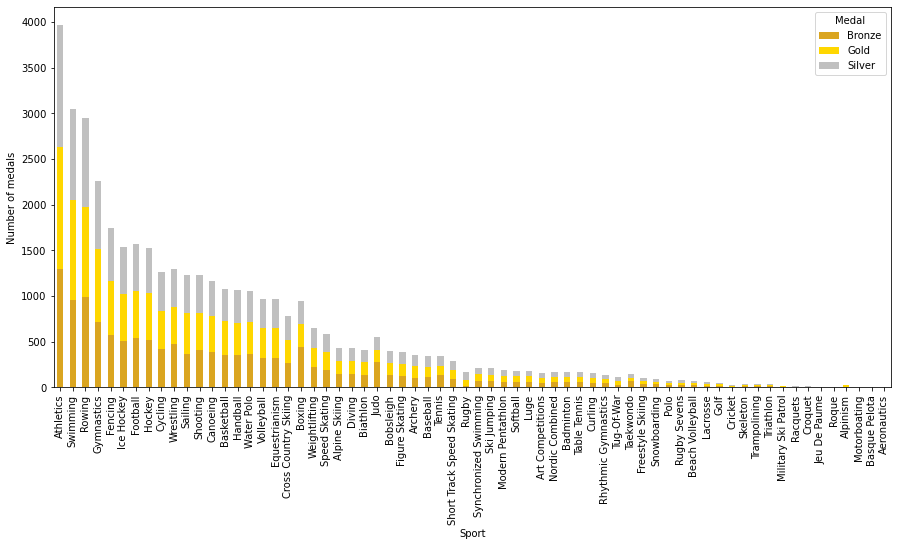

In [184]:
    # count number of medals awarded to each event
medal_counts= df.groupby(['Sport', 'Medal']).size()

    # drop na values
medal_counts = medal_counts.dropna()

    #sort value begining by the highest number of medal won 
medal_counts = medal_counts.sort_values(ascending=True).reset_index()

    #Renaming columns
medal_counts.columns = ['Sport', 'Medal', "Count"]

    #Pivot_table and plot
medal_counts.pivot_table(index='Sport', columns='Medal', values='Count',
                aggfunc='sum', fill_value=0).sort_values(["Silver","Bronze","Gold"], ascending=False)\
                .plot.bar(stacked=True, ylabel = "Number of medals", figsize=(15,7),\
                          color={"Bronze": "goldenrod", "Silver": "silver", "Gold": "gold"})

#Categorical variable assicated to the type of won medal.
#df_gold=df[df.Medal == "Gold"].groupby('Year').Sport.value_counts().reset_index(name='Gold')
#df_silver = df[df.Medal == "Silver"].groupby('Year').Sport.value_counts().reset_index(name='Silver')
#df_bronze = df[df.Medal == "Bronze"].groupby('Year').Sport.value_counts().reset_index(name='Bronze')

<AxesSubplot:xlabel='Sport', ylabel='Number of medals'>

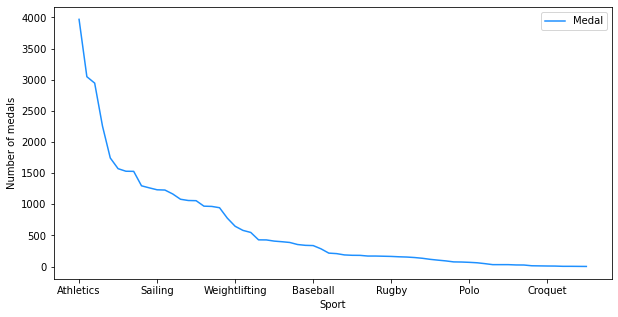

In [191]:
#Which sport has the more medal ?
    #Count number of sport with number of medal obtained
df_sport = df[['Sport','Medal']].groupby('Sport').count()
df_sport.reset_index(inplace=True)

    #Sorting values by number of medal
df_sport = df_sport.sort_values('Medal', ascending=False)

    #plot
df_sport.plot(x='Sport', y='Medal', ylabel="Number of medals", color="dodgerblue", figsize=(10,5))

<AxesSubplot:xlabel='Year', ylabel='Number of medals'>

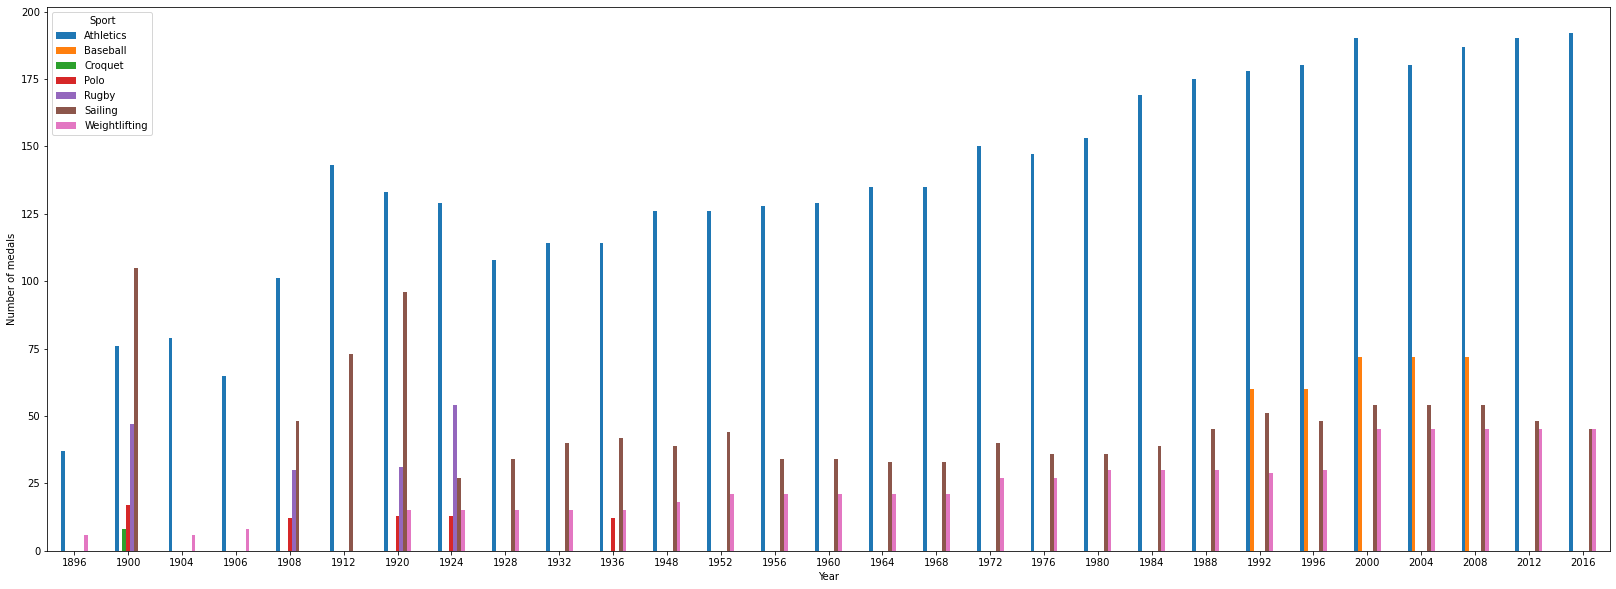

In [192]:
#Does it change overtime ?
    #List the top sport
top_sport=["Athletics", "Sailing", "Weightlifting", "Baseball", "Rugby", "Polo", "Croquet"]

    #Filter the dataframe 
Top_Sport_series = df.Sport.isin(top_sport)
df_filtered_sport = df[Top_Sport_series]  

    #Define dataframe group by year and sport
df_filtered_sport = df_filtered_sport[['Sport','Medal','Year']].groupby(['Sport','Year']).count()

    #Pivot table to make bar working with values
df_filtered_sport = df_filtered_sport.pivot_table(index='Year', columns='Sport', values='Medal',\
                     aggfunc='sum', fill_value=0).sort_values(["Year"], ascending=True)\
    #Plot bar 
df_filtered_sport.plot.bar(stacked=False, figsize=(28,10), rot=0, ylabel= "Number of medals")

In 1990, the sport which has more medal was not athletics but **sailing**. The number of medals won in athletics has increased steadily over the years. Although, baseball was the second sport to earn medal in the olympic games of 1992, 1996, 2000, 2004 and 2008.

<Figure size 432x288 with 0 Axes>

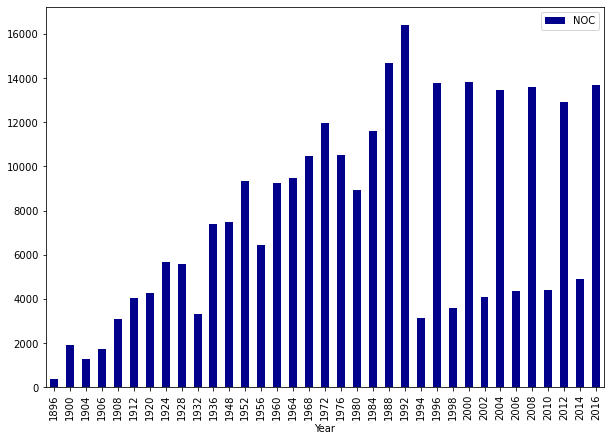

In [69]:
#Number of countries vs time
    #Group by Year and count number of countries, and sort by Years begining by 1896
nb_country_time=df.groupby('Year',as_index=False)['NOC'].count().sort_values(by='Year',ascending=True)

    #plot
plt.figure()
nb_country_time.plot(x="Year", y="NOC", kind="bar", color="darkblue", figsize=(10,7));
plt.show();

<AxesSubplot:xlabel='Countries', ylabel='Count'>

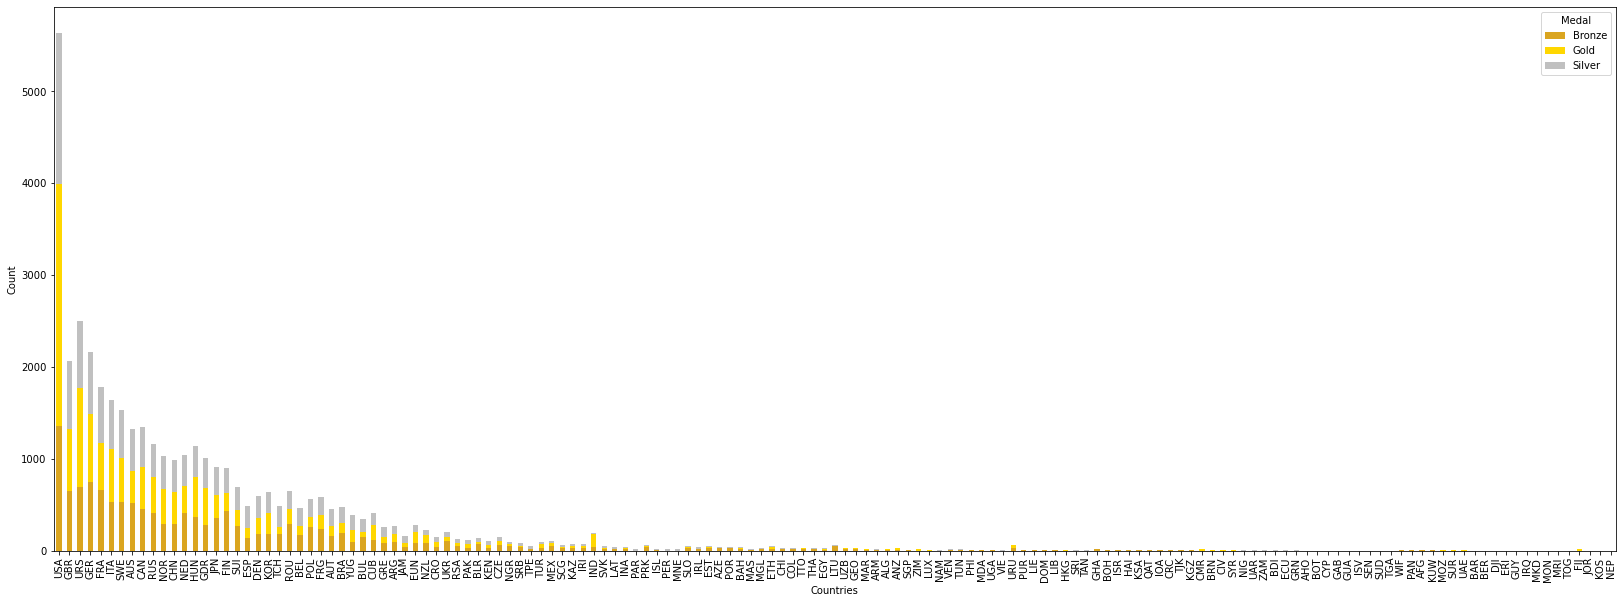

In [193]:
#Medals across countries
    # count number of medals awarded to each country
medal_counts= df.groupby(['NOC', 'Medal']).size().dropna().sort_values(ascending=True).reset_index()

    #Rename columns
medal_counts.columns = ['NOC', 'Medal', "Count"]

    #Pivot table and plot
medal_counts.pivot_table(index='NOC', columns='Medal', values='Count',
                aggfunc='sum', fill_value=0).sort_values(["Silver","Bronze","Gold"], ascending=False)\
                .plot.bar(stacked=True, figsize=(28,10), xlabel= "Countries", ylabel="Count", color={"Bronze": "goldenrod", "Silver": "silver", "Gold": "gold"})

<AxesSubplot:xlabel='Year'>

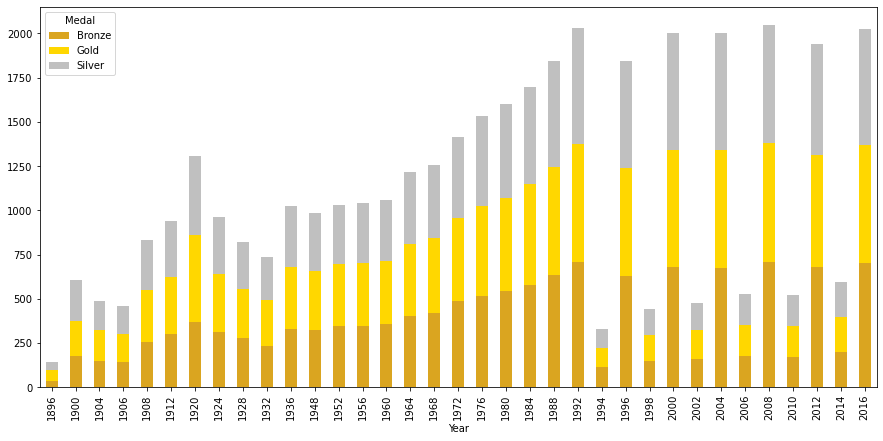

In [69]:
#Does it change overtime?
    # count number of medals awarded to each Year and drop missing values
medal_counts= df.groupby(['Year', 'Medal']).size().dropna().sort_values(ascending=True).reset_index()
medal_counts.columns = ['Year', 'Medal', "Count"]

    #Pivot table to make stacked histogram and sort by year
medal_counts.pivot_table(index='Year', columns='Medal', values='Count',
                aggfunc='sum', fill_value=0).sort_values(["Year"], ascending=True)\
                .plot.bar(stacked=True, figsize=(15,7), color={"Bronze": "goldenrod", "Silver": "silver", "Gold": "gold"})

## 2. Modelling a 2D correlation (5pts)

**2.1.** Define analytical function `model_height(weight, *params)` that would well describe the average behaviour of heights *v.s* weights. This function will have some free parameters `*params` to be latter adjusted. 

In [3]:
#Height and weight variables follow a linear regression as y = mx + b where m is the slope and b the intercept
    #Get rid of missing values by replacing with the mean
df.copy()
df['Height'].fillna(value=df['Height'].mean(), inplace=True)
df['Weight'].fillna(value=df['Weight'].mean(), inplace=True)

    #Define function
def model_height(weight, *params):
    m= df['Weight']
    b = df['Height']
    slope_intercept = np.polyfit(m,b,1)
    height= slope_intercept[0] * weight + slope_intercept[1]
    return height

    #Test with 50 kg
model_height(50)

163.3234910821809

**2.2.** Define bins of weights, for each bin compute the averaged weight and the average height. Store them into two arrays, `meanW` and `meanH`.

In [4]:
    #Define list of bins, -np.inf return the min of weight
bins = [-np.inf, 40, 60, 80, 100, np.inf]

    #Adding column bin in the dataframe
df['MyBins'] = pd.cut(df['Weight'], bins)

    #Computing the mean for each bins
meanW = df.groupby('MyBins')['Weight'].mean()
meanH = df.groupby('MyBins')['Height'].mean()


## 3. Toward building a n-dimenstional predictive model (5pts+3pts)

**3.1.** Define two populations, athelete-event with and without a medal, and find and plot few distributions that shows some discriminating power for these two populations.

**3.2. BONUS QUESTION.** Using the library of you choice, try to build a model that predict the probablity to win medal for a given athelete.

<ipython-input-155-968822784c13>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new_df=new_df.astype(np.int, errors='ignore')


Age      Height  \
Medal Event                                                                   
0     Alpine Skiing Men's Combined                    24.022305  178.696263   
      Alpine Skiing Men's Downhill                    24.010082  176.935515   
      Alpine Skiing Men's Giant Slalom                23.271163  176.308381   
      Alpine Skiing Men's Slalom                      23.486433  176.585198   
      Alpine Skiing Men's Super G                     24.420183  178.952043   
...                                                         ...         ...   
1     Wrestling Women's Flyweight, Freestyle          25.200000  155.133333   
      Wrestling Women's Heavyweight, Freestyle        27.266667  172.066667   
      Wrestling Women's Light-Heavyweight, Freestyle  24.750000  168.500000   
      Wrestling Women's Lightweight, Freestyle        26.200000  162.666667   
      Wrestling Women's Middleweight, Freestyle       24.666667  164.933333   

                                                         Weight  Year  
Medal Event                                                            
0     Alpine Skiing Men's Combined                    79.551974  1985  
      Alpine Skiing Men's Downhill                    76.156913  1977  
      Alpine Skiing Men's Giant Slalom                74.527038  1983  
      Alpine Skiing Men's Slalom                      74.500491  1982  
      Alpine Skiing Men's Super G                     80.638578  1998  
...                                                         ...   ...  
1     Wrestling Women's Flyweight, Freestyle          48.200000  2010  
      Wrestling Women's Heavyweight, Freestyle        73.133333  2010  
      Wrestling Women's Light-Heavyweight, Freestyle  70.000000  2016  
      Wrestling Women's Lightweight, Freestyle        56.600000  2010  
      Wrestling Women's Middleweight, Freestyle       62.800000  2010  

[1479 rows x 4 columns]

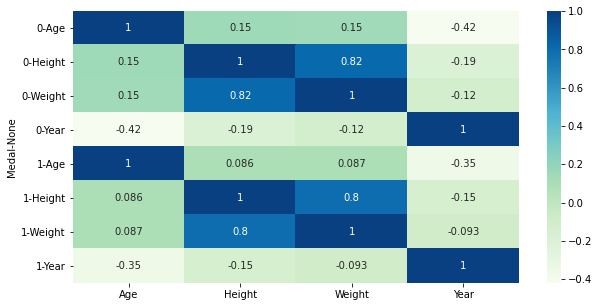

In [155]:
    #If medal won, assigning 1 , if not medal, assigning 0
#df['Medal'] = df['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)

    #Drop categorical columns
new_df=df.drop(['ID', 'Name', 'Games'], axis=1)

    #Create dataframe that gather Medal and event and compute the mean for age, height, weight, year variables
new_df=new_df.groupby(['Medal', 'Event']).mean()

    #Convert float years to int
new_df=new_df.astype(np.int, errors='ignore')

    #finding variables that can be distinguished easily between the 2 populations
plt.figure(1, figsize=(10,5))
correlation=new_df.groupby(['Medal']).corr()
seaborn.heatmap(correlation, cmap ="GnBu", annot = True)

    #plot distributions
new_df

**The steps to build and use a model are:**

* Define: The type of model will be a DecisionTree 
* Fit: Capture patterns from the df. 
* Predict: Just what it sounds like
* Evaluate: Determine how accurate the model's predictions are.

In [113]:
#Build a model that predict the probability to win medal for a given athlete

#Cleaning df

    #Detect missing values in df
df.loc[df['Age'].isna(), ['ID', 'Name', 'Age']]

    #Replace NaN with mean or average
    
df['Height'].fillna(value=df['Height'].mean(), inplace=True)
df['Weight'].fillna(value=df['Weight'].mean(), inplace=True)
df['Age'].fillna(value=df['Weight'].mean(), inplace=True) 

    #Changing type to integer
df.Height = df.Height.astype(int)
df.Weight = df.Weight.astype(int)

#Target variable
y= df["Medal"]

#If Male, assigning 0 value, if female assigning 1
#df['Sex'] = df['Sex'].apply(lambda x: 1 if str(x) != 'M' else 0)

#Predictive
feature_names = ["Age", "Sex", "Height", "Weight"] #error with age, used fillna for age
X= df[feature_names]

#define a model

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(random_state=1)
cross_val_score(regressor, X, y, cv=10)

#Fit the model
regressor.fit(X,y)

#Make predictions
predictions = regressor.predict(X)

#Compare predictions with values of y
print("Predictions: ", predictions[0:5])
print(y.head(5))

#Validation of the model
from sklearn.metrics import mean_absolute_error
print("\n Mean absolute error is :", mean_absolute_error(y, predictions))


Predictions:  [0.14285714 0.08108108 0.15329099 0.16666667 0.        ]
0    0
1    0
2    0
3    1
4    0
Name: Medal, dtype: int64

 Mean absolute error is : 0.194908205532153
